In [1]:
### Tiền xử lý dữ liệu

In [3]:
#Làm sạch dữ liệu

In [5]:
import pandas as pd

df1 = pd.read_csv("comments.csv")
df2 = pd.read_csv("commentss.csv")

df = pd.concat([df1, df2], ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168063 entries, 0 to 168062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           141281 non-null  float64
 1   comment_id   141281 non-null  float64
 2   title        168059 non-null  object 
 3   thank_count  168063 non-null  int64  
 4   customer_id  168063 non-null  int64  
 5   rating       168063 non-null  int64  
 6   content      120345 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 9.0+ MB


In [9]:
#Xóa các dữ liệu bị trùng lặp
df = df.drop_duplicates(subset=['customer_id','content'], keep='first')

#Xóa các cột không cần thiết như id, thank_count, customer_id
df = df.drop(columns=['id'])
df = df.drop(columns=['thank_count'])
df = df.drop(columns=['customer_id'])

# Xoá những dòng bị thiếu ở cột 'content' (quan trọng để xử lý text)
df = df.dropna(subset=['content'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 2 to 168054
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comment_id  80562 non-null  float64
 1   title       88774 non-null  object 
 2   rating      88777 non-null  int64  
 3   content     88777 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [11]:
#Load các danh sách emoji, stopword, từ viết tắt để chuẩn bị làm sạch dữ liệu

In [13]:
import re

#Danh sách các emoji cần xóa
emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Mặt cười, cảm xúc
        u"\U0001F300-\U0001F5FF"  # Biểu tượng thiên nhiên, đối tượng
        u"\U0001F680-\U0001F6FF"  # Biểu tượng giao thông
        u"\U0001F1E0-\U0001F1FF"  # Cờ quốc gia
        u"\U00002702-\U000027B0"  # Ký hiệu dạng hình
        u"\U000024C2-\U0001F251"  # Ký hiệu đóng khung
        u"\U0001F926-\U0001F937"  # Hành động, cử chỉ
        u"\U00010000-\U0010FFFF" # Các ký tự bổ sung
        u"\u200d"                 # Nối ký tự (zero width joiner)
        u"\u2640-\u2642"          # Ký hiệu giới tính
        u"\u2600-\u2B55"          # Biểu tượng đa dạng khác
        u"\u23cf"                 # Biểu tượng đẩy đĩa
        u"\u23e9"                 # Tua nhanh
        u"\u231a"                 # Đồng hồ
        u"\u3030"                 # Dấu ngoằn ngoèo
        u"\ufe0f"                 # Bộ chọn kiểu hiển thị
        "]+", flags=re.UNICODE
)

#Load danh sách các stop word
vietnamese_stopwords = set(open('vietnamese-stopwords.txt', encoding='utf-8').read().splitlines())

#Load danh sách các từ viết tắt hay sử dụng trong tiếng Việt
short_word_dict = {
    "ko": "không",
    "kg": "không",
    "khong": "không",
    "k": "không",
    "kh": "không",
    "cx": "cũng",
    "mik": "mình",
    "mn": "mọi người",
    "bt": "bình thường",
    "nv": "nhân viên",
    "sp": "sản phẩm",
    "đc": "được",
    "dc": "được",
    "đk": "điều khoản",
    "đt": "điện thoại",
    "j": "gì",
    "vs": "với",
    "hok": "không",
    "lun": "luôn",
    "z": "gì",
    "zậy": "gì vậy",
    "thik": "thích",
    "hum": "hôm",
    "wa": "qua",
    "m": "mình",
    "mk": "mình",
    "bn": "bạn",
    "ok": "ổn",
    "t":  "tôi",
    "e":   "em",
    "a":   "anh",
    "bc":  "bác",
    "ad":  "admin",
    "mod": "moderator",
    "ib":  "inbox",
    "inb": "inbox",
    "stt": "status",
    "tl":  "trả lời",
    "tks": "cảm ơn",
    "thx": "cảm ơn",
    "thank": "cảm ơn",
    "cn":  "công nghệ",
    "tech": "công nghệ",
    "sv":  "sinh viên",
    "nt":  "nhắn tin",
    "tn":  "tin nhắn",
    "mxh": "mạng xã hội",
    "cf":  "cà phê",
    "bp":  "bộ phận",
    "pk":  "phụ kiện",
    "tb":  "thông báo",
    "hp":  "hạnh phúc",
    "cv":  "công việc",
    "ck":  "chuyển khoản",
    "vk":  "vợ",
    "ckho": "chồng",
    "sk":  "sức khỏe",
    "gw":  "gửi",
    "vl":  "vãi l*n",
    "vkl": "vãi cả l*n",
    "sml": "sấp mặt luôn"
}

In [15]:
#Trực quan hóa stop word

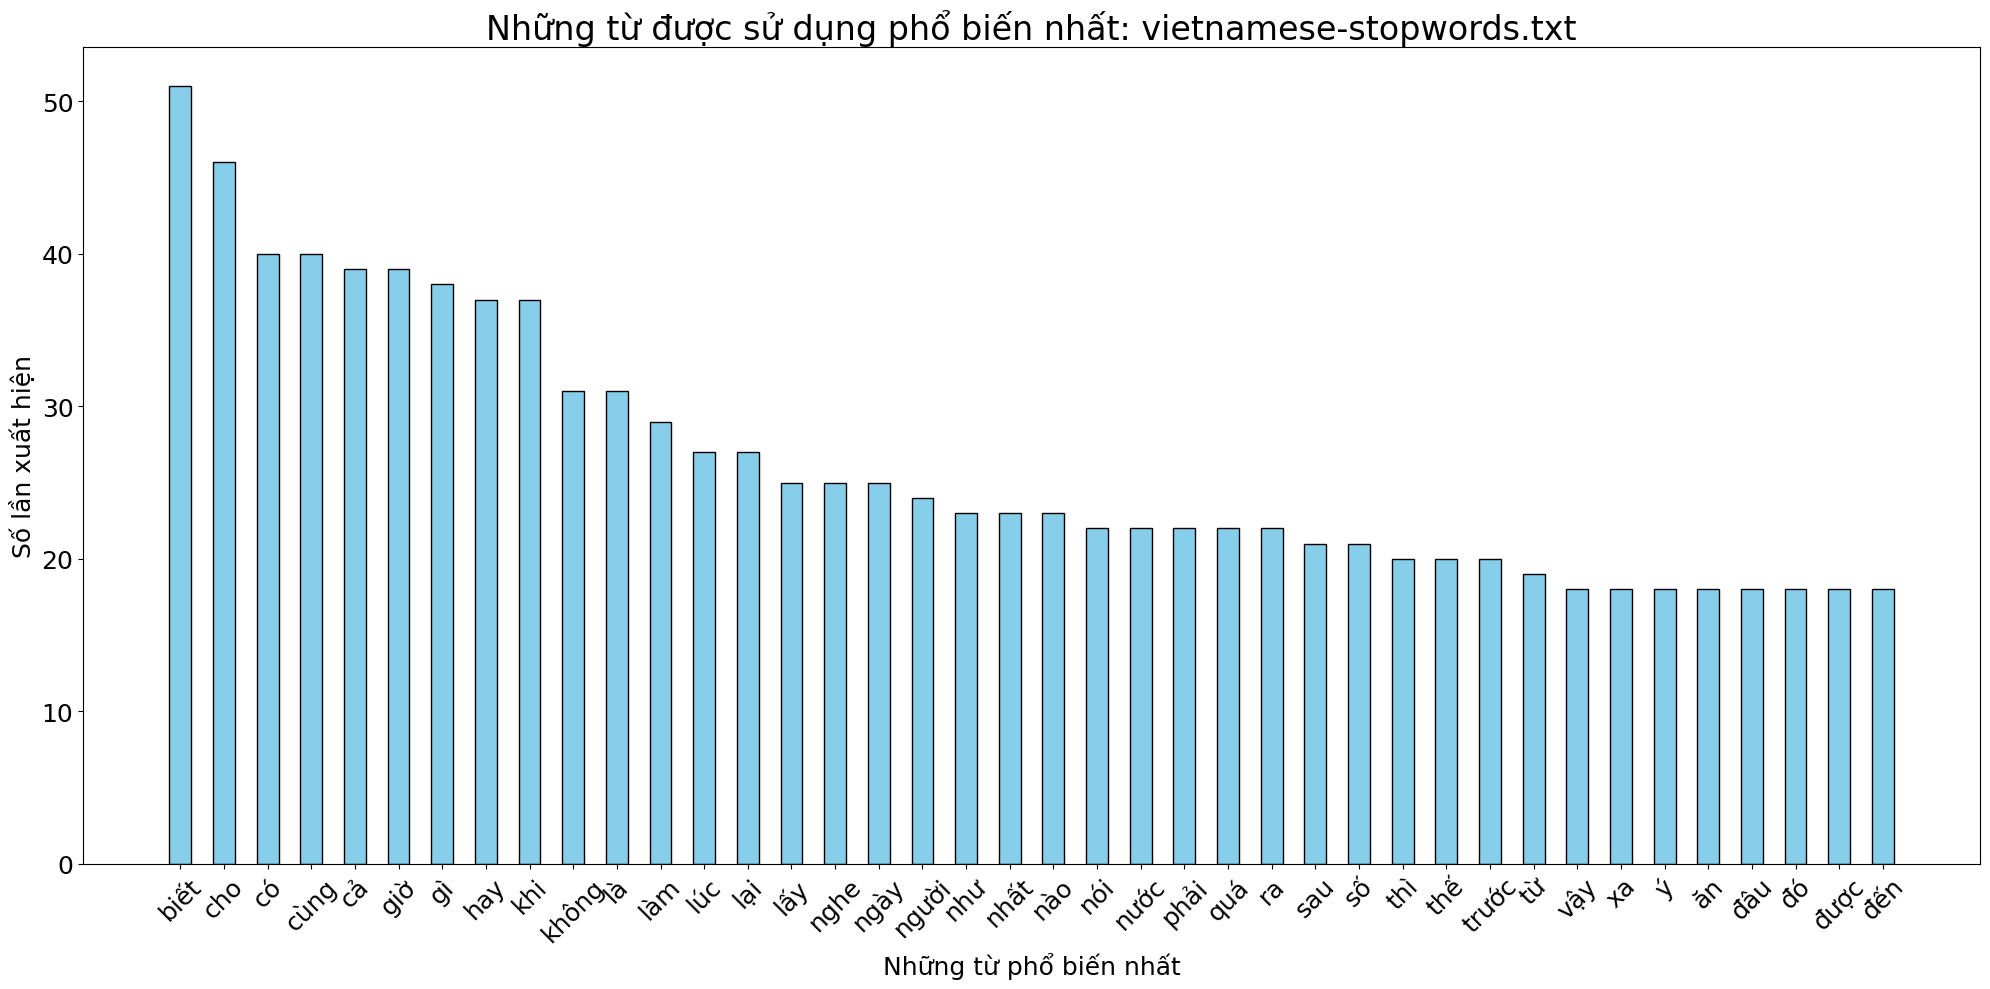

In [17]:
import numpy as np
from matplotlib import pyplot as plt

def plotWordFrequency(vietnamese_file):
    # Đọc file stopword
    with open(vietnamese_file, 'r', encoding='utf-8') as f:
        words = [x for y in [l.strip().split() for l in f.readlines()] for x in y]

    # Đếm số lần xuất hiện của từ và xắp xếp chúng theo thứ tự
    data = sorted([(w, words.count(w)) for w in set(words)], key=lambda x: x[1], reverse=True)[:40]

    most_words = [x[0] for x in data]
    times_used = [x[1] for x in data]

    # Vẽ biểu đồ cột
    plt.figure(figsize=(20, 10))
    plt.bar(x=sorted(most_words), height=times_used, color='skyblue', edgecolor='black', width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Những từ phổ biến nhất', fontsize=18)
    plt.ylabel('Số lần xuất hiện', fontsize=18)
    plt.title('Những từ được sử dụng phổ biến nhất: %s' % vietnamese_file.split('/')[-1], fontsize=24)
    plt.tight_layout()
    plt.show()
    
plotWordFrequency('vietnamese-stopwords.txt')

In [19]:
#Hàm làm sạch dữ liệu

In [21]:
from underthesea import word_tokenize # Bộ ngữ nghĩa
from underthesea import text_normalize #Chuẩn hóa văn bản

def clean_data(text):
    #Loại bỏ NaN / non-string
    if not isinstance(text, str):
        return ""
    
    #Chuyển chữ thường
    text = text.lower()
    
    #Rút gọn ký tự lặp (okkkkk → ok)
    text = re.sub(r"(.)\1{2,}", r"\1", text)
    
    #Xóa emoji
    text = emoji_pattern.sub("", text)
    
    #Xóa ký tự đặc biệt (chỉ giữ chữ và số)
    text = re.sub(r"[^\w\s]", " ", text)
    
    #Chuẩn hóa dấu câu, gạch nối, v.v.
    text = text_normalize(text)
    
    #Chuẩn hóa từ viết tắt
    words = text.split()
    words = [short_word_dict.get(w, w) for w in words]
    text = " ".join(words)
    
    #Tách từ bằng Underthesea
    text = word_tokenize(text, format="text")
    
    return text

In [22]:
###Chuẩn hóa dữ liệu

In [25]:
#Chuẩn hóa cột content
df['clean_content'] = df['content'].map(lambda text: clean_data(text))

#Chuẩn hóa cột title
df['title'] = df['title'].map(lambda text: clean_data(text))
df['title'] = df['title'].str.replace('_', ' ')
#Kiểm tra
df.head(5)

,comment_id,title,rating,content,clean_content
2,NaN,cực kì hài lòng,5,"Sách nhà Giver đợt này lạ, sách viết về tài ch...",sách nhà giver đợt này lạ_sách viết về tài_chí...
3,NaN,cực kì hài lòng,5,"Vừa nhận sách là lên cmt liền, sách gì dễ thươ...",vừa nhận sách là lên cmt liền sách gì dễ_thươn...
4,NaN,cực kì hài lòng,5,"mình rất thích quyển sách này, chủ để tài chín...",mình rất thích quyển sách này chủ để tài_chính...
5,NaN,bình thường,3,"Nội dung cũng bình thường, không tung hô quá n...",nội_dung cũng bình_thường không tung hô quá nh...
6,NaN,cực kì hài lòng,5,Tiki giao nhanh. Nội dung sách cũng rất hay,tiki giao nhanh nội_dung sách cũng rất hay


In [27]:
###Phân tích dữ liệu

In [29]:
#Mức độ tập trung của các từ

Number of unique words: 51668
Top 20 words:
  sách         89643
  mình         46534
  không        41892
  và           36524
  rất          34779
  đọc          32471
  có           30997
  là           29331
  giao         28627
  hàng         28061
  được         26001
  của          25179
  hay          24223
  nhưng        21847
  cuốn         21415
  nên          20595
  nhanh        20439
  thì          20137
  về           20108
  đẹp          19408


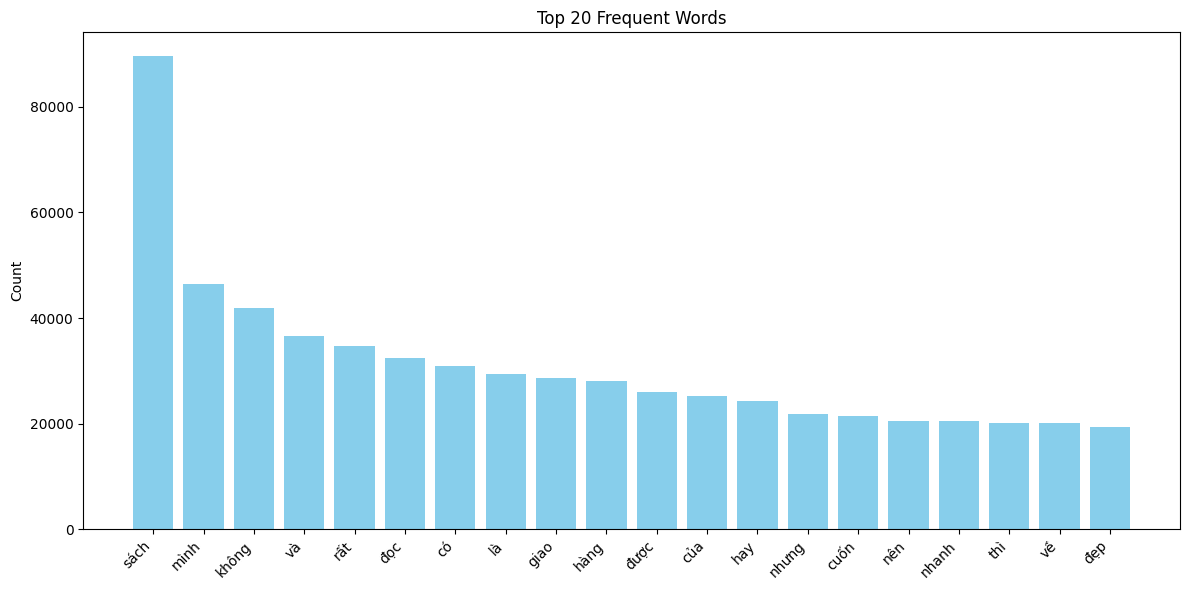

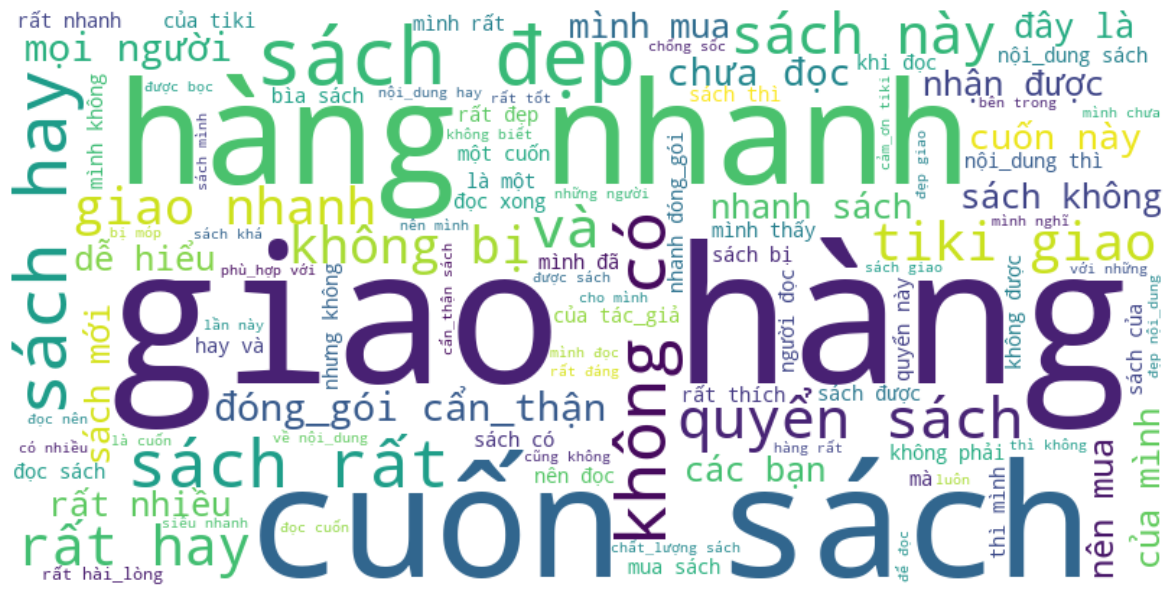

In [31]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_stats(tokens, top_n=20, wc_max_words=100,
                    figsize_bar=(12, 6), figsize_wc=(15, 7.5),
                    bar_color='skyblue', wc_colormap='viridis'):
    
    #Tính tần suất và lấy Top N
    freq_dist = nltk.FreqDist(tokens)
    total_words = len(freq_dist)
    common_words = freq_dist.most_common(top_n)

    #In thống kê
    print(f'Number of unique words: {total_words}')
    print(f'Top {top_n} words:')
    for word, cnt in common_words:
        print(f'  {word:<12} {cnt:>5}')

    #Bar chart tần suất
    words, counts = zip(*common_words)
    plt.figure(figsize=figsize_bar)
    plt.bar(words, counts, color=bar_color)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Frequent Words')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    #WordCloud
    corpus = ' '.join(tokens)
    wc = WordCloud(
        max_words=wc_max_words,
        background_color='white',
        width=800,
        height=400,
        colormap=wc_colormap
    ).generate(corpus)

    plt.figure(figsize=figsize_wc)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


#Chuẩn bị danh sách token từ cột clean_content
tokens = [
    tk for txt in df['clean_content'].dropna().tolist()
    for tk in txt.split()
]

#Gọi hàm với mặc định Top 20 và tối đa 100 từ cho WordCloud
plot_word_stats(tokens)

In [32]:
#Phân tích phân phối độ dài câu trong các đánh giá của khách hàng

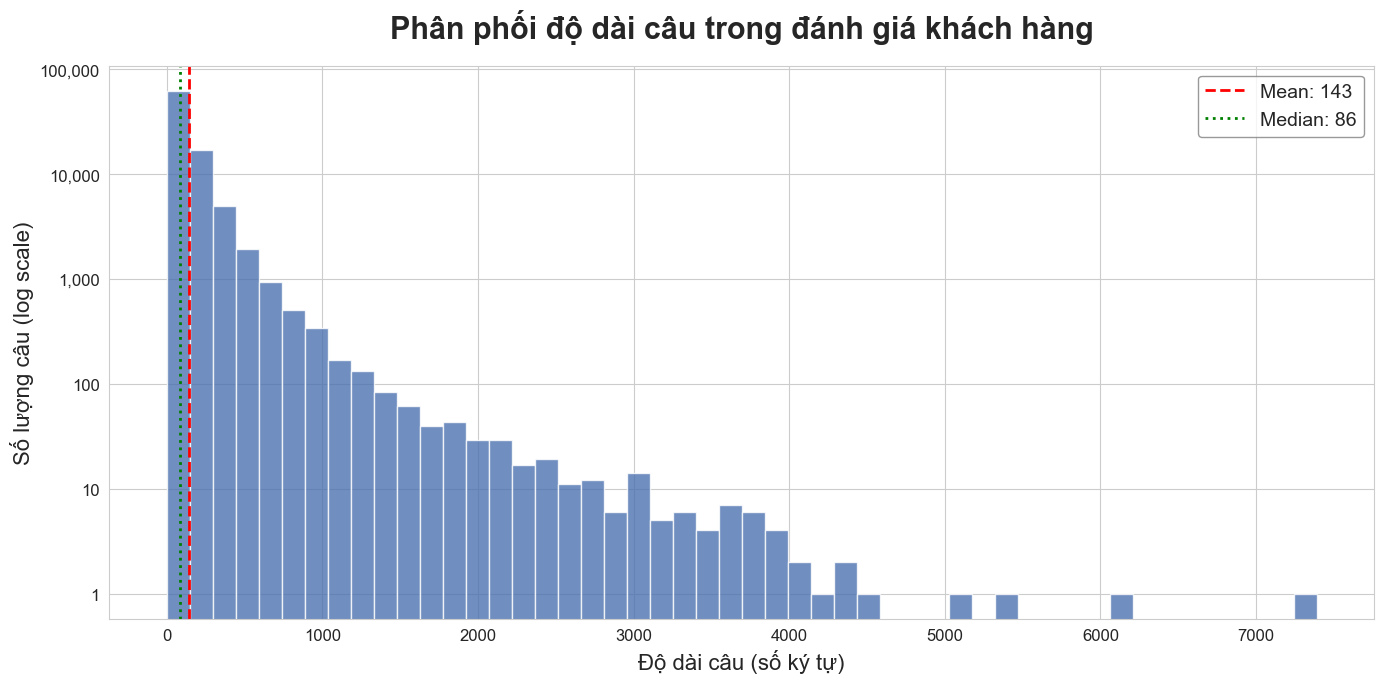

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
import seaborn as sns  

#Style tổng thể
sns.set_style("whitegrid")
plt.rc("font", size=12)

#Tính độ dài câu và các thống kê cơ bản
lengths = df['clean_content'].apply(len)
mean_len = lengths.mean()
median_len = lengths.median()

#Vẽ histogram với log-scale cho trục y
fig, ax = plt.subplots(figsize=(14, 7))
n, bins, patches = ax.hist(
    lengths,
    bins=50,
    color="#4C72B0",
    edgecolor="white",
    alpha=0.8
)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

#Vẽ đường trung bình và trung vị
ax.axvline(mean_len, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_len:.0f}")
ax.axvline(median_len, color="green", linestyle=":", linewidth=2, label=f"Median: {median_len:.0f}")

#Tiêu đề và nhãn
ax.set_title(
    "Phân phối độ dài câu trong đánh giá khách hàng",
    fontsize=22, fontweight="bold", pad=20
)
ax.set_xlabel("Độ dài câu (số ký tự)", fontsize=16)
ax.set_ylabel("Số lượng câu (log scale)", fontsize=16)

#Tinh chỉnh ticks
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.tick_params(axis="both", labelsize=12)

#Hiển thị chú giải
ax.legend(fontsize=14, frameon=True, edgecolor="gray")

plt.tight_layout()
plt.show()

In [37]:
#Phân tích dữ liệu phân bố giữa label và rating

C:\Users\PC\AppData\Local\Temp\ipykernel_21472\4234247909.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


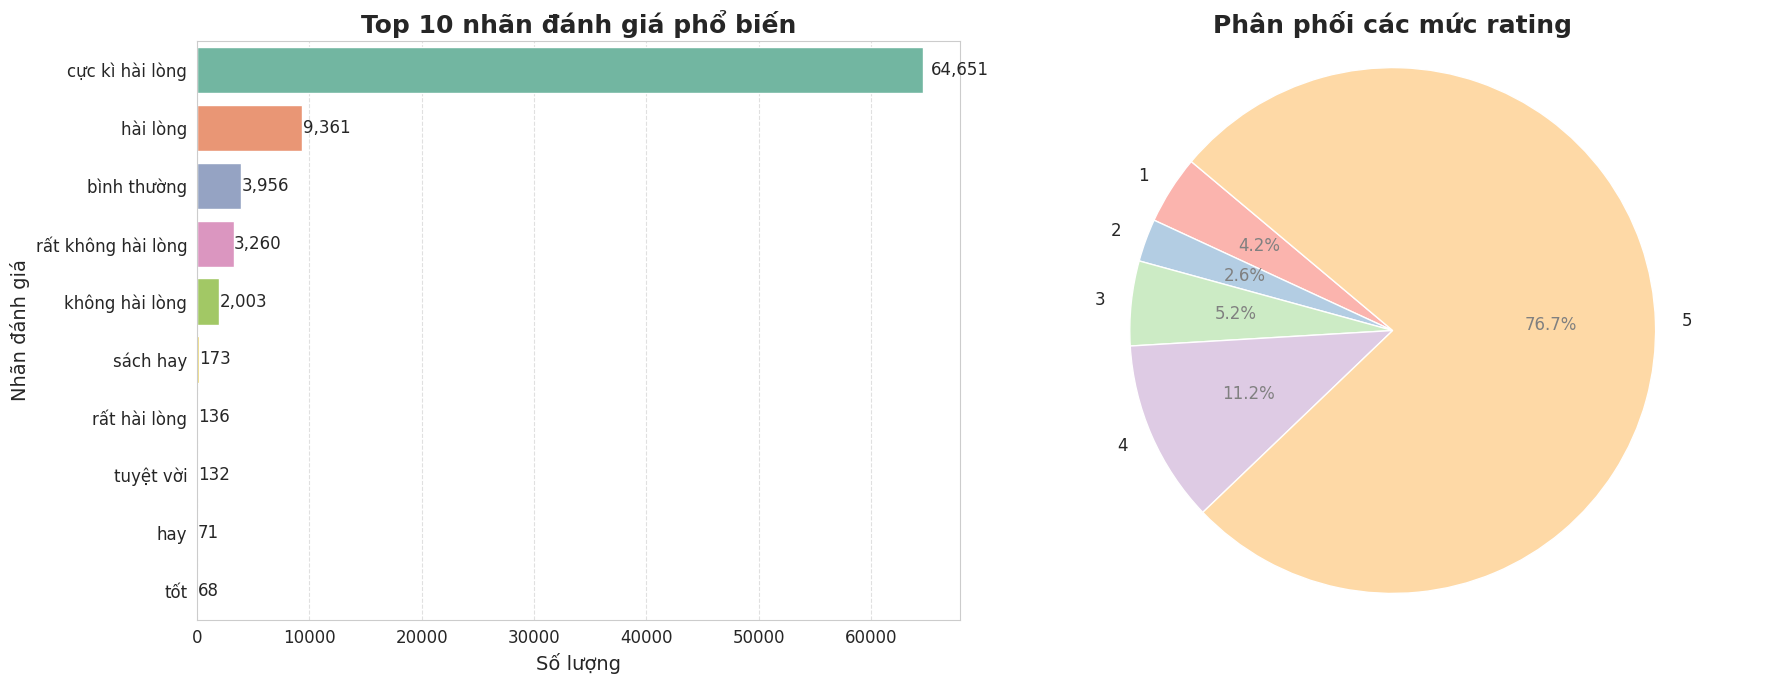

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#Thiết lập style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Chuẩn bị dữ liệu
top_titles = df['title'].value_counts().nlargest(10)
rating_counts = df['rating'].value_counts().sort_index()

#Tạo Figure và 2 axes
fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=(18, 7))

#Barplot ngang: Top 10 nhãn phổ biến
sns.barplot(
    x=top_titles.values,
    y=top_titles.index,
    palette='Set2',
    ax=ax_bar
)
ax_bar.set_title('Top 10 nhãn đánh giá phổ biến')
ax_bar.set_xlabel('Số lượng')
ax_bar.set_ylabel('Nhãn đánh giá')
ax_bar.grid(axis='x', linestyle='--', alpha=0.6)

#Đánh dấu giá trị ở đầu thanh
for i, (count, label) in enumerate(zip(top_titles.values, top_titles.index)):
    ax_bar.text(
        count + count*0.01,          #vị trí ngang: hơi lệch phải
        i,                           #vị trí dọc: chỉ số thanh
        f'{count:,}',                #văn bản: định dạng có dấu phẩy
        va='center', 
        fontsize=12
    )

#Pie chart: phân phối rating
colors = sns.color_palette('Pastel1', len(rating_counts))
wedges, texts, autotexts = ax_pie.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
ax_pie.set_title('Phân phối các mức rating')
ax_pie.axis('equal')

#Nâng cấp font size cho phần trăm
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('gray')

plt.tight_layout()
plt.show()

In [41]:
###Cân bằng mẫu

In [43]:
##Cân bằng mẫu với 2 nhãn 

In [45]:
#Gộp thành 2 nhãn

In [47]:
import numpy as np

# Nếu rating ≥4 → tích cực, ngược lại → tiêu cực
df['title'] = np.where(
    df['rating'] >= 4,
    'cực kỳ hài lòng',
    'không hài lòng'
)

print(df['title'].value_counts())

title
cực kỳ hài lòng    78079
không hài lòng     10698
Name: count, dtype: int64


In [49]:
#Trực quan dữ liệu 2 nhãn

C:\Users\PC\AppData\Local\Temp\ipykernel_21472\2078117514.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words),
C:\Users\PC\AppData\Local\Temp\ipykernel_21472\2078117514.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words),


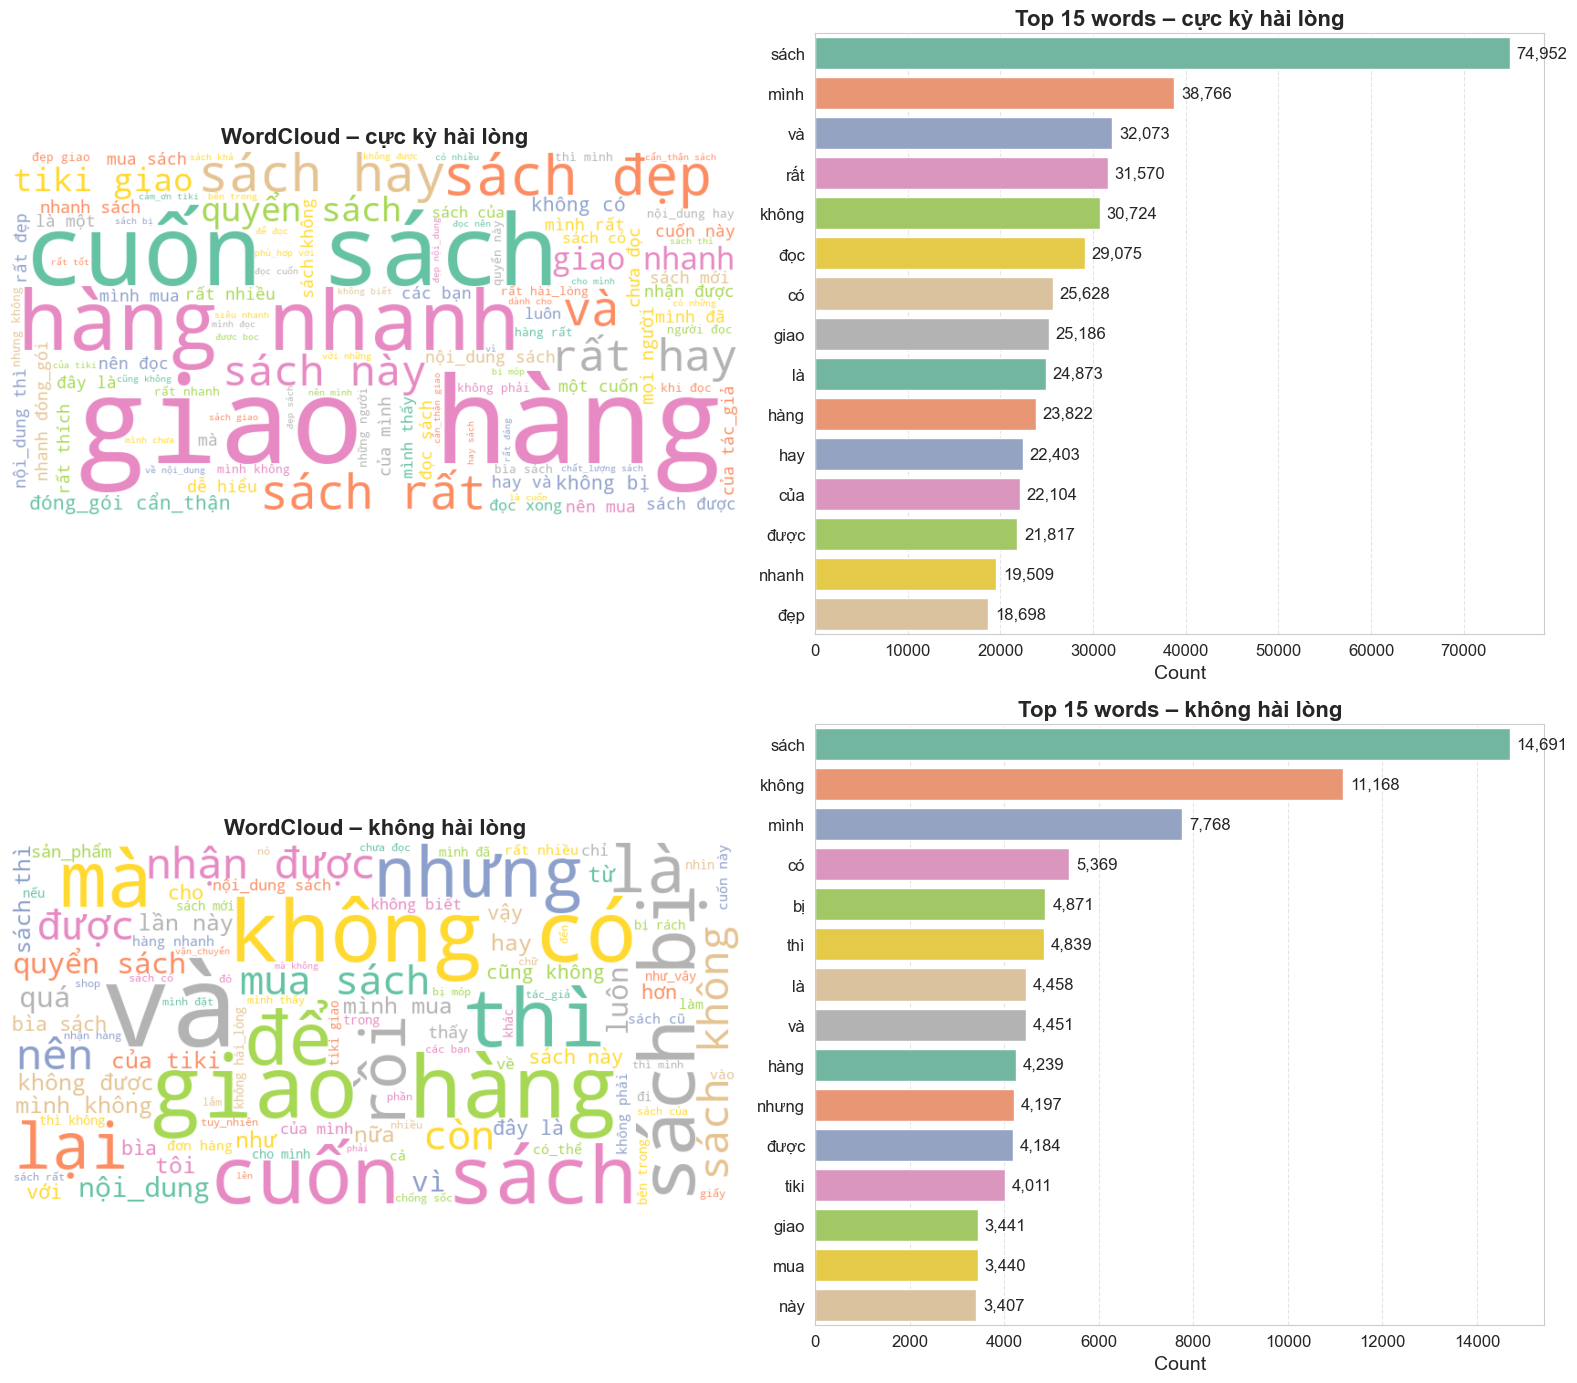

In [51]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

def compare_wordcloud_and_barchart(
    df,
    text_col="clean_content",
    label_col="title",
    labels=("cực kỳ hài lòng", "không hài lòng"),
    top_n=15,
    wc_max_words=100
):
    import nltk
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud

    sns.set_style("whitegrid")
    plt.rcParams.update({"font.size": 12})

    #Chuẩn bị dữ liệu
    groups = {}
    for lbl in labels:
        tokens = [
            tok for txt in df[df[label_col]==lbl][text_col].dropna()
            for tok in txt.split() if tok.strip()
        ]
        groups[lbl] = {"tokens": tokens, "freq": nltk.FreqDist(tokens)}

    #Vẽ
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()

    for i, lbl in enumerate(labels):
        #WordCloud với colormap tên "Set2"
        corpus = " ".join(groups[lbl]["tokens"])
        wc = WordCloud(
            max_words=wc_max_words,
            background_color="white",
            colormap="Set2",
            width=800, height=400
        ).generate(corpus)

        ax_wc = axes[i*2]
        ax_wc.imshow(wc, interpolation="bilinear")
        ax_wc.axis("off")
        ax_wc.set_title(f"WordCloud – {lbl}")

        #Bar chart
        most_common = groups[lbl]["freq"].most_common(top_n)
        words, counts = zip(*most_common)
        ax_bar = axes[i*2+1]
        sns.barplot(x=list(counts), y=list(words),
                    palette="Set2", ax=ax_bar)
        ax_bar.set_title(f"Top {top_n} words – {lbl}")
        ax_bar.set_xlabel("Count")
        ax_bar.grid(axis="x", linestyle="--", alpha=0.5)
        for j, cnt in enumerate(counts):
            ax_bar.text(cnt + max(counts)*0.01, j, f"{cnt:,}", va="center")

    plt.tight_layout()
    plt.show()

#Gọi hàm
compare_wordcloud_and_barchart(
    df,
    text_col="clean_content",
    label_col="title",
    labels=("cực kỳ hài lòng", "không hài lòng"),
    top_n=15,
    wc_max_words=100
)

In [52]:
#Chia đều tập dữ liệu

In [55]:
import pandas as pd

#Phân bổ lại nhãn sao cho cân bằng
df_cuc_ky_hai_long = df[df['title'] == 'cực kỳ hài lòng'].sample(
    n=df[df['title']=='không hài lòng'].shape[0],  #Số lượng tương đương nhóm 'không hài lòng'
    replace=False,
    random_state=42
)

df_khong_hai_long = df[df['title'] == 'không hài lòng']

#Nối lại và xáo trộn
df_balanced_2_label = pd.concat(
    [df_cuc_ky_hai_long, df_khong_hai_long],
    axis=0
).sample(frac=1, random_state=42).reset_index(drop=True)

#Kiểm tra cân bằng
print(df_balanced_2_label['title'].value_counts())

title
cực kỳ hài lòng    10698
không hài lòng     10698
Name: count, dtype: int64


In [57]:
#So sánh

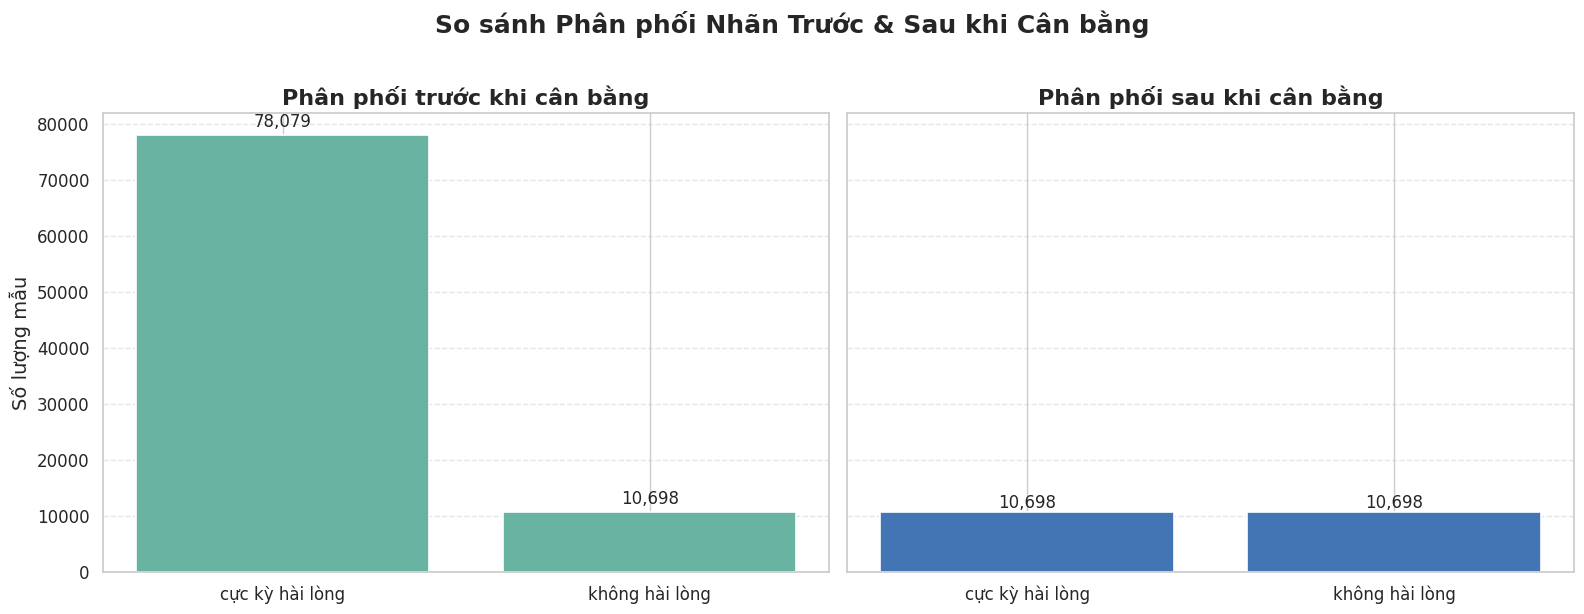

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

#Thiết lập style chung
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

#Chuẩn bị dữ liệu
before = df['title'].value_counts().sort_index()
after  = df_balanced_2_label['title'].value_counts().sort_index()

#Tạo Figure với 2 subplot share y-axis để so sánh trực quan
fig, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1,
    figsize=(16, 6),
    sharey=True
)

#Bar chart trước khi cân bằng
bars1 = ax1.bar(
    before.index,
    before.values,
    color="#69b3a2", 
    edgecolor="white",
    linewidth=1.2
)
ax1.set_title("Phân phối trước khi cân bằng")
ax1.set_xlabel("")
ax1.set_ylabel("Số lượng mẫu")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

#Annotation cho bars1
for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height + max(before.values)*0.01,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=12
    )

#Bar chart sau khi cân bằng
bars2 = ax2.bar(
    after.index,
    after.values,
    color="#4374B3",   
    edgecolor="white",
    linewidth=1.2
)
ax2.set_title("Phân phối sau khi cân bằng")
ax2.set_xlabel("")
ax2.set_ylabel("")    #vì đã share y với ax1
ax2.grid(axis="y", linestyle="--", alpha=0.5)

#Annotation cho bars2
for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height + max(after.values)*0.01,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=12
    )

#Tiêu đề chung
fig.suptitle("So sánh Phân phối Nhãn Trước & Sau khi Cân bằng",
             fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [63]:
#Chia tập dữ liệu thành train và test với tỷ lệ 70-30

In [65]:
from sklearn.model_selection import train_test_split

X = df_balanced_2_label['clean_content']
y = df_balanced_2_label['title']

train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y              
)

print(f"Train size: {len(train_sentences)}  —  Test size: {len(test_sentences)}")
print(train_labels.value_counts(), "\n", test_labels.value_counts())

Train size: 14977  —  Test size: 6419
title
không hài lòng     7489
cực kỳ hài lòng    7488
Name: count, dtype: int64 
 title
cực kỳ hài lòng    3210
không hài lòng     3209
Name: count, dtype: int64


In [67]:
##Cân bằng mẫu với 3 nhãn

In [69]:
#Gộp thành 3 nhãn chính

In [71]:
import numpy as np
import pandas as pd

#np.where lồng nhau
df['title_vec'] = np.where(
    df['rating'] >= 4, 'cực kỳ hài lòng',
    np.where(df['rating'] == 3, 'bình thường', 'không hài lòng')
)

#map qua dict
rating_map = {
    5: 'cực kỳ hài lòng',
    4: 'cực kỳ hài lòng',
    3: 'bình thường',
    2: 'không hài lòng',
    1: 'không hài lòng'
}
df['title_map'] = df['rating'].map(rating_map)

#pd.cut với bins và labels
bins   = [0, 2, 3, 5]  # (0,2]→1–2, (2,3]→3, (3,5]→4–5
labels = ['không hài lòng', 'bình thường', 'cực kỳ hài lòng']
df['title_cut'] = pd.cut(
    df['rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

#Chọn một trong ba cột làm cột chính
df['title'] = df['title_vec']

print(df['title'].value_counts())

title
cực kỳ hài lòng    78079
không hài lòng      6079
bình thường         4619
Name: count, dtype: int64


In [73]:
#Trực quan hóa 3 nhãn

C:\Users\PC\AppData\Local\Temp\ipykernel_21472\440408343.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_21472\440408343.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_21472\440408343.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


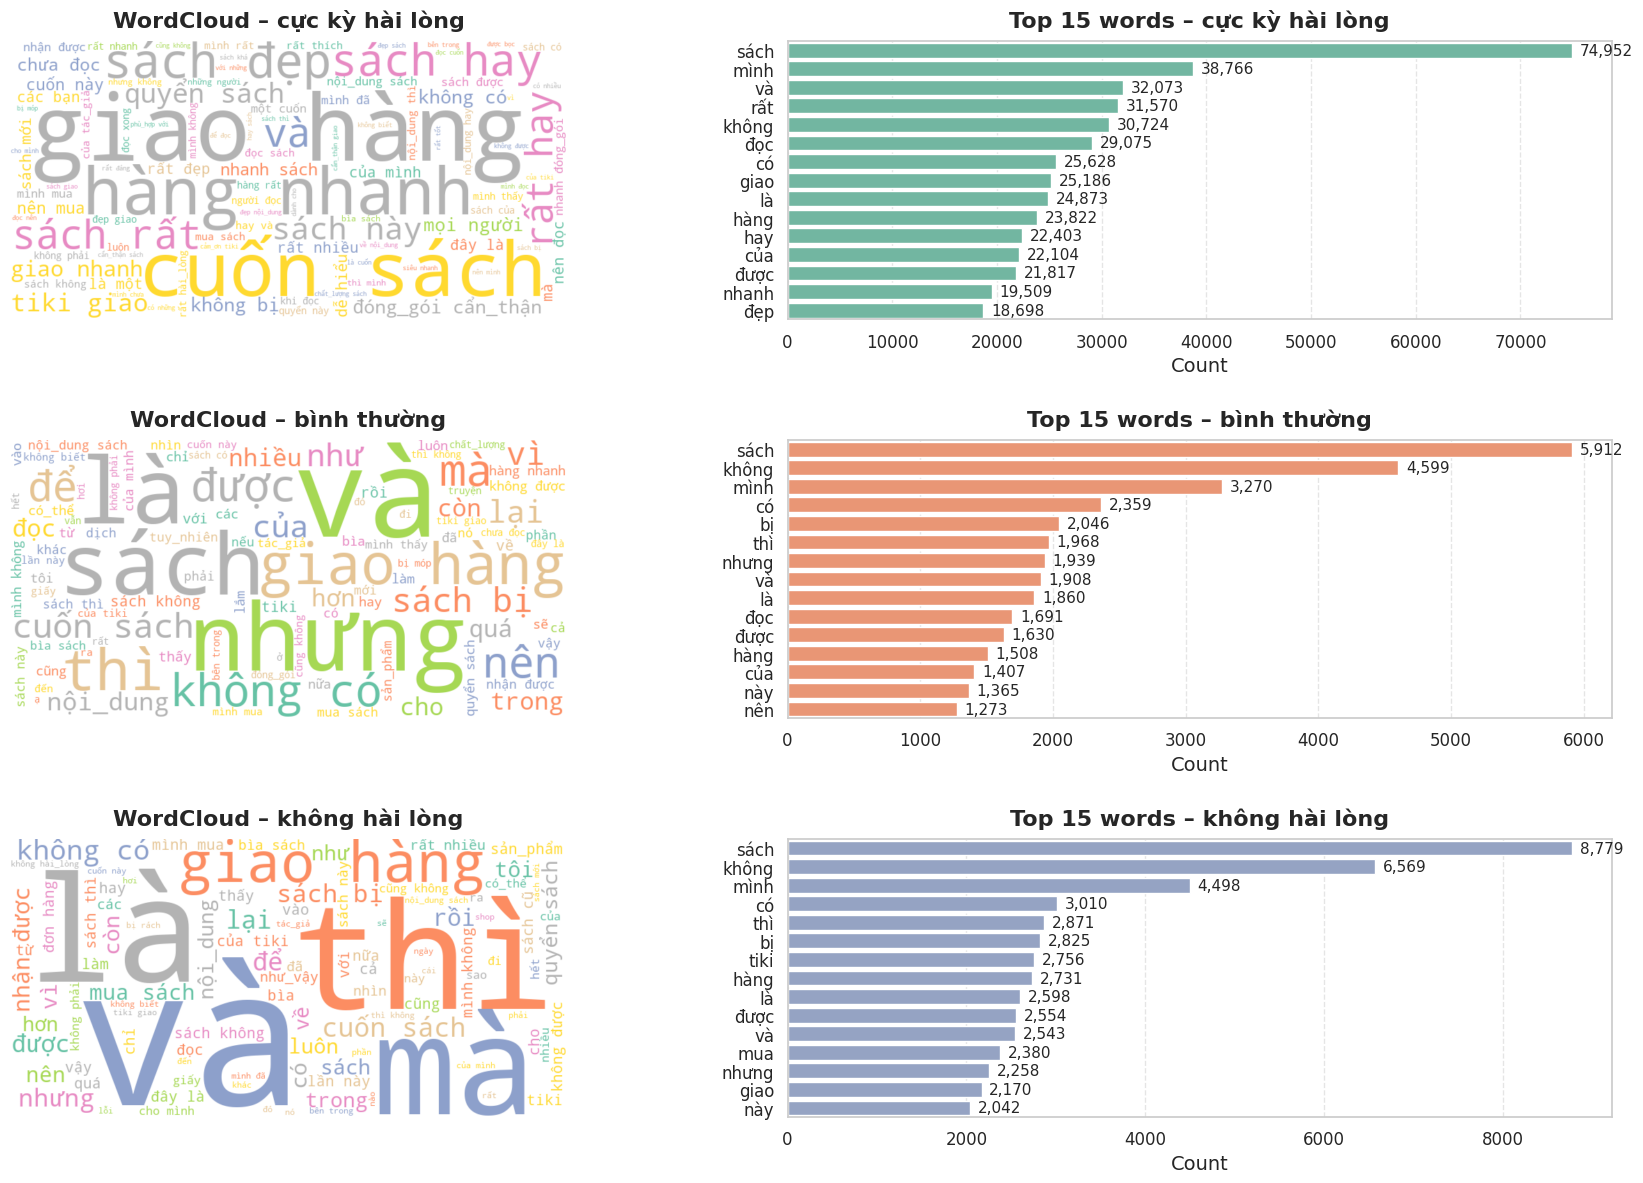

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

def plot_three_groups(df, text_col, label_col, 
                      labels=("cực kỳ hài lòng","bình thường","không hài lòng"),
                      top_n=15, wc_max_words=100,
                      figsize=(18, 12)):
    """
    - df: DataFrame
    - text_col: tên cột chứa text đã tách từ (các token cách nhau bằng space)
    - label_col: tên cột nhãn (3 mức độ)
    - labels: thứ tự và tên nhãn
    - top_n: số từ phổ biến hiển thị trên bar chart
    - wc_max_words: số từ tối đa cho WordCloud
    """
    n = len(labels)
    fig, axes = plt.subplots(n, 2, figsize=figsize)
    palettes = sns.color_palette("Set2", n_colors=n)

    for i, lbl in enumerate(labels):
        #Lấy list tokens
        tokens = [
            tok for txt in df[df[label_col] == lbl][text_col].dropna()
            for tok in txt.split() if tok.strip()
        ]
        freq_dist = nltk.FreqDist(tokens)
        corpus = " ".join(tokens)

        #WordCloud
        wc = WordCloud(
            max_words=wc_max_words,
            background_color="white",
            colormap="Set2",   
            width=800, height=400,
            normalize_plurals=False
        ).generate(corpus)

        ax_wc = axes[i, 0]
        ax_wc.imshow(wc, interpolation="bilinear")
        ax_wc.axis("off")
        ax_wc.set_title(f"WordCloud – {lbl}", pad=10)

        #Bar Chart Top N từ
        top_words = freq_dist.most_common(top_n)
        words, counts = zip(*top_words)
        ax_bar = axes[i, 1]
        sns.barplot(
            x=list(counts), 
            y=list(words), 
            palette=[palettes[i]]*top_n,
            ax=ax_bar
        )
        ax_bar.set_title(f"Top {top_n} words – {lbl}", pad=10)
        ax_bar.set_xlabel("Count")
        ax_bar.set_ylabel("")
        ax_bar.grid(axis="x", linestyle="--", alpha=0.5)

        #Annotate giá trị
        max_cnt = max(counts)
        for j, cnt in enumerate(counts):
            ax_bar.text(
                cnt + max_cnt * 0.01, j, f"{cnt:,}", 
                va="center", fontsize=11
            )

    plt.tight_layout(h_pad=2, w_pad=4)
    plt.show()


#Gọi hàm
plot_three_groups(
    df, 
    text_col="clean_content", 
    label_col="title",
    labels=("cực kỳ hài lòng", "bình thường", "không hài lòng"),
    top_n=15, 
    wc_max_words=100
)

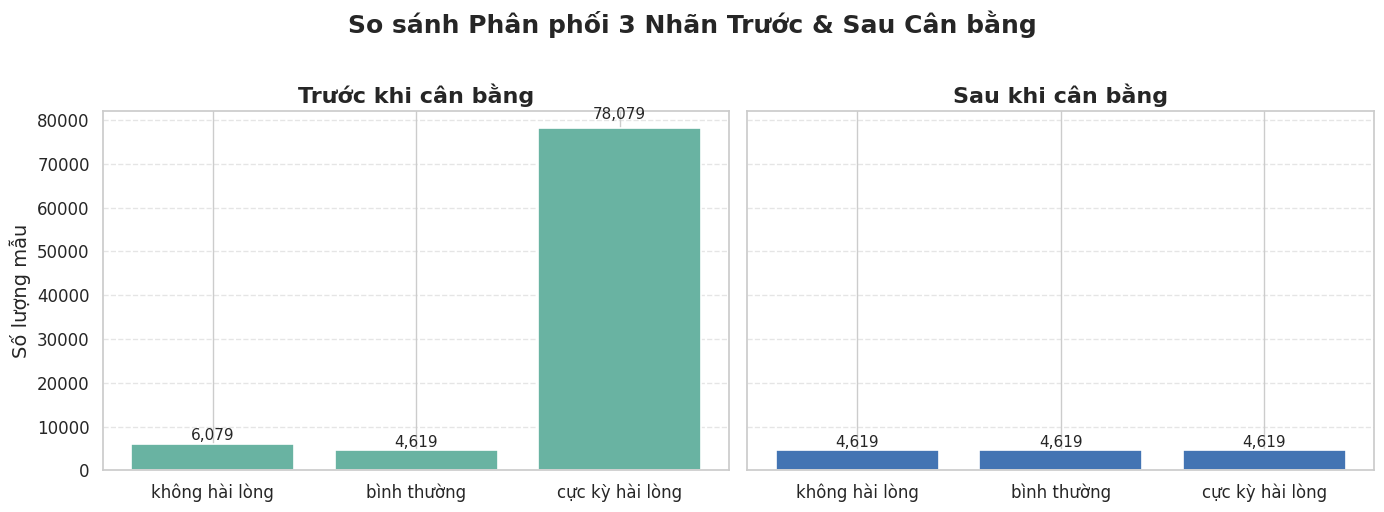

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})


def label_three(df: pd.DataFrame, src: str = 'rating') -> pd.DataFrame:
    """
    Gộp rating thành 3 nhãn có thứ tự:
      - 'không hài lòng'   : rating < 3
      - 'bình thường'      : rating == 3
      - 'cực kỳ hài lòng'  : rating >= 4
    """
    df = df.copy()
    df['title'] = np.where(
        df[src] >= 4, 'cực kỳ hài lòng',
        np.where(df[src] == 3, 'bình thường', 'không hài lòng')
    )
    df['title'] = pd.Categorical(
        df['title'],
        categories=['không hài lòng', 'bình thường', 'cực kỳ hài lòng'],
        ordered=True
    )
    return df


def balance(df: pd.DataFrame, label: str = 'title', random_state: int = 42) -> pd.DataFrame:
    """
    Undersample mỗi nhãn sao cho đều bằng số mẫu của nhãn ít nhất.
    Trả về DataFrame mới đã reset index.
    """
    min_count = df[label].value_counts().min()
    balanced = pd.concat(
        df[df[label] == lbl].sample(min_count, random_state=random_state)
        for lbl in df[label].cat.categories
    ).reset_index(drop=True)
    return balanced


def plot_distribution(
    df_before: pd.DataFrame,
    df_after: pd.DataFrame,
    label: str = 'title'
) -> None:
    """
    Vẽ bar chart so sánh phân phối nhãn trước và sau khi cân bằng.
    """
    order = df_before[label].cat.categories
    counts_before = df_before[label].value_counts().reindex(order)
    counts_after  = df_after[label].value_counts().reindex(order)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    for ax, cnt, subtitle, color in zip(
        axes,
        [counts_before, counts_after],
        ["Trước khi cân bằng", "Sau khi cân bằng"],
        ["#69b3a2", "#4374B3"]
    ):
        bars = ax.bar(order, cnt.values, color=color, edgecolor="white", linewidth=1.2)
        ax.set_title(subtitle)
        ax.set_ylabel("Số lượng mẫu" if ax is axes[0] else "")
        ax.grid(axis="y", linestyle="--", alpha=0.5)

        # Annotate counts
        for bar in bars:
            height = int(bar.get_height())
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height * 1.02,
                f"{height:,}",
                ha="center",
                va="bottom",
                fontsize=11
            )

    fig.suptitle(
        "So sánh Phân phối 3 Nhãn Trước & Sau Cân bằng",
        fontsize=18, fontweight="bold", y=1.02
    )
    plt.tight_layout()
    plt.show()


# -------- Chạy tuần tự --------

# 1. Gắn nhãn 3 class
df_labeled = label_three(df, src='rating')

# 2. Cân bằng dữ liệu, đặt tên đúng biến
df_balanced_3_label = balance(df_labeled, label='title', random_state=42)

# 3. Vẽ biểu đồ so sánh phân phối
plot_distribution(df_labeled, df_balanced_3_label, label='title')

In [79]:
#Chia tập dữ liệu thành train và test với tỷ lệ 70-30

In [85]:
from sklearn.model_selection import train_test_split

# Features và labels
X = df_balanced_3_label['clean_content']
y = df_balanced_3_label['title']

# Chia train/test theo tỷ lệ 80/20, giữ tỷ lệ nhãn (stratify=y)
train_sentences_3, test_sentences_3, train_labels_3, test_labels_3 = train_test_split(
    X,
    y,
    test_size=0.3,       
    random_state=42,
    stratify=y
)

# In thông tin kích thước và phân phối nhãn
print(f"Train size: {len(train_sentences_3)}, Test size: {len(test_sentences_3)}")
print("Train label counts:\n", train_labels_3.value_counts())
print("Test  label counts:\n", test_labels_3.value_counts())

Train size: 9699, Test size: 4158
Train label counts:
 title
không hài lòng     3233
bình thường        3233
cực kỳ hài lòng    3233
Name: count, dtype: int64
Test  label counts:
 title
không hài lòng     1386
bình thường        1386
cực kỳ hài lòng    1386
Name: count, dtype: int64


In [87]:
###Text Feature
##Trích xuất đặc trưng cho Machine Learning
#CountVectorizer (scikit-learn) dùng để biến mỗi câu thành một vector số , nhằm phục vụ cho các mô hình machine learning.
#Mỗi thành phần của vector biểu diễn số lần xuất hiện của một từ (feature) trong câu đó.
#Cách hoạt động:
#- Xây dựng “từ điển” (vocabulary): tập hợp tất cả từ xuất hiện trong tập huấn luyện.
#- Với mỗi câu, đếm số lần mỗi từ trong từ điển xuất hiện.
#- Không quan tâm vị trí hay thứ tự các từ (bag-of-words).
#- Đầu ra là một ma trận kích thước (số câu × số từ trong từ điển), mỗi ô chứa giá trị đếm.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

#Tập 2 nhãn
vectorizer_2 = CountVectorizer()
X_train_2 = vectorizer_2.fit_transform(train_sentences)
X_test_2  = vectorizer_2.transform(test_sentences)
y_train_2 = train_labels
y_test_2  = test_labels

#Tập 3 nhãn
vectorizer_3 = CountVectorizer()
X_train_3 = vectorizer_3.fit_transform(train_sentences_3)
X_test_3  = vectorizer_3.transform(test_sentences_3)
y_train_3 = train_labels_3
y_test_3  = test_labels_3

In [91]:
!pip install tensorflow

In [93]:
#TF-IDF (Term Frequency - Inverse Document Frequency) kết hợp hai chỉ số để xác định mức độ quan trọng của mỗi từ trong một tập văn bản
#- TF đo tần suất xuất hiện của từ trong một tài liệu
#- IDF đo độ “hiếm” của từ đó trên toàn bộ tập tài liệu.
#- Kết quả giúp chúng ta phân biệt từ chung (“và”, “là”) với từ mang nhiều thông tin (“hàng”, “chậm”).

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tập 2 nhãn
vectorizer_2 = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=8000,
    token_pattern=r'(?u)\b\w+\b'
)

X_train_2 = vectorizer_2.fit_transform(train_sentences)
X_test_2  = vectorizer_2.transform(test_sentences)

#Tập 3 nhãn
vectorizer_3 = TfidfVectorizer(
    ngram_range=(1, 2),        # unigram + bigram
    max_features=10000,        # giới hạn số từ đặc trưng
    token_pattern=r'(?u)\b\w+\b'  # giữ cả từ đơn ký tự
)

X_train_3 = vectorizer_3.fit_transform(train_sentences_3)
X_test_3  = vectorizer_3.transform(test_sentences_3)

In [97]:
##Feature Selection

In [99]:
#Univariate Selection (Chi-square)
#Cho 3 nhãn
from sklearn.feature_selection import SelectKBest, chi2

# Số đặc trưng giữ lại
k3 = 4000   # cho 3 nhãn

# 1. Với CountVectorizer

chi2_sel_count_3 = SelectKBest(chi2, k=k3)
X3_count_chi2 = chi2_sel_count_3.fit_transform(X_train_3, y_train_3)
X3_count_chi2_test = chi2_sel_count_3.transform(X_test_3)

# 2. Với TfidfVectorizer

chi2_sel_tfidf_3 = SelectKBest(chi2, k=k3)
X3_tfidf_chi2 = chi2_sel_tfidf_3.fit_transform(X_train_3, y_train_3)
X3_tfidf_chi2_test = chi2_sel_tfidf_3.transform(X_test_3)

In [101]:
## Machine Learning model
#Hàm huấn luyện mô hình

In [103]:
from sklearn.model_selection import GridSearchCV
import time

def optimize_model(model, param_grid, X_train, Y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, Y_train)
    return grid.best_estimator_, grid.best_params_


def train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name="Mô hình", label_type=""):
    print(f"\nBắt đầu huấn luyện {model_name.upper()} ({label_type})...")
    start_time = time.time()

    #Huấn luyện
    model.fit(X_train, Y_train)

    #Dự đoán
    Y_pred = model.predict(X_test)

    #Thời gian huấn luyện
    elapsed = time.time() - start_time

    #Đánh giá
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted')
    rec = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    cm = confusion_matrix(Y_test, Y_pred)

    # In kết quả
    print(f"\n ===== {model_name.upper()} ({label_type}) =====")
    print(f"Thời gian huấn luyện: {elapsed:.2f} giây")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1-score     : {f1:.4f}")
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    print("Confusion Matrix:\n", cm)

    return {
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "train_time": elapsed
    }

In [105]:
#Hàm trực quan so sánh kết quả mô hình

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def def_truc_quan(ket_qua_dict, label_type="", Y_test=None):
    #Sắp xếp mô hình theo accuracy giảm dần
    sorted_models = sorted(
        ket_qua_dict.items(),
        key=lambda x: x[1]['accuracy'],
        reverse=True
    )

    #Tách tên mô hình & độ chính xác
    models = [model for model, _ in sorted_models]
    accuracy = [ket_qua_dict[model]['accuracy'] for model in models]

    #Màu sắc cho từng mô hình
    colors = sns.color_palette("Set2", len(models))

    # Vẽ biểu đồ Accuracy
    plt.figure(figsize=(9, 6))
    bars = plt.barh(models, accuracy, color=colors)
    plt.xlabel('Accuracy', fontsize=12)
    plt.title(f'So sánh Accuracy giữa các mô hình ({label_type})', fontsize=14)
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    #Ghi giá trị Accuracy lên từng thanh
    for bar, acc in zip(bars, accuracy):
        plt.text(acc + 0.005, bar.get_y() + bar.get_height()/2,
                 f'{acc:.3f}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    #Nếu có Y_test, lấy nhãn để vẽ confusion matrix
    label_names = None
    if Y_test is not None:
        label_names = np.unique(Y_test)

    #Vẽ confusion matrix cho từng mô hình
    for model in models:
        cm = ket_qua_dict[model].get("confusion_matrix")
        if cm is not None and label_names is not None:
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                        xticklabels=label_names,
                        yticklabels=label_names,
                        cbar=False)
            plt.title(f'Confusion Matrix — {model} ({label_type})', fontsize=13)
            plt.xlabel('Dự đoán')
            plt.ylabel('Thực tế')
            plt.tight_layout()
            plt.show()

In [109]:
#Chạy thử và so sánh các mô hình

In [111]:
#2 nhãn

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Danh sách mô hình và thông số tương ứng
models_2 = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "SVM": SVC(kernel='linear', random_state=42)
}

ket_qua_2_nhan = {}

# Vòng lặp huấn luyện từng mô hình
for model_name, model in models_2.items():
    result = train_and_evaluate_model(
        model,
        X_train_2,
        y_train_2,
        X_test_2,
        y_test_2,
        model_name=model_name,
        label_type="2 nhãn"
    )
    ket_qua_2_nhan[model_name] = result  # lưu kết quả vào dict

# Gán lại từng kết quả mô hình riêng biệt sau vòng lặp
result_nb_2  = ket_qua_2_nhan["Naive Bayes"]
result_rf_2  = ket_qua_2_nhan["Random Forest"]
result_lr_2  = ket_qua_2_nhan["Logistic Regression"]
result_svm_2 = ket_qua_2_nhan["SVM"]


Bắt đầu huấn luyện NAIVE BAYES (2 nhãn)...

 ===== NAIVE BAYES (2 nhãn) =====
Thời gian huấn luyện: 0.05 giây
Accuracy     : 0.8642
Precision    : 0.8644
Recall       : 0.8642
F1-score     : 0.8641
Classification Report:
                  precision    recall  f1-score   support

cực kỳ hài lòng       0.87      0.85      0.86      3210
 không hài lòng       0.86      0.88      0.87      3209

       accuracy                           0.86      6419
      macro avg       0.86      0.86      0.86      6419
   weighted avg       0.86      0.86      0.86      6419

Confusion Matrix:
 [[2734  476]
 [ 396 2813]]

Bắt đầu huấn luyện RANDOM FOREST (2 nhãn)...

 ===== RANDOM FOREST (2 nhãn) =====
Thời gian huấn luyện: 19.58 giây
Accuracy     : 0.8587
Precision    : 0.8610
Recall       : 0.8587
F1-score     : 0.8585
Classification Report:
                  precision    recall  f1-score   support

cực kỳ hài lòng       0.89      0.82      0.85      3210
 không hài lòng       0.83      0.90      0

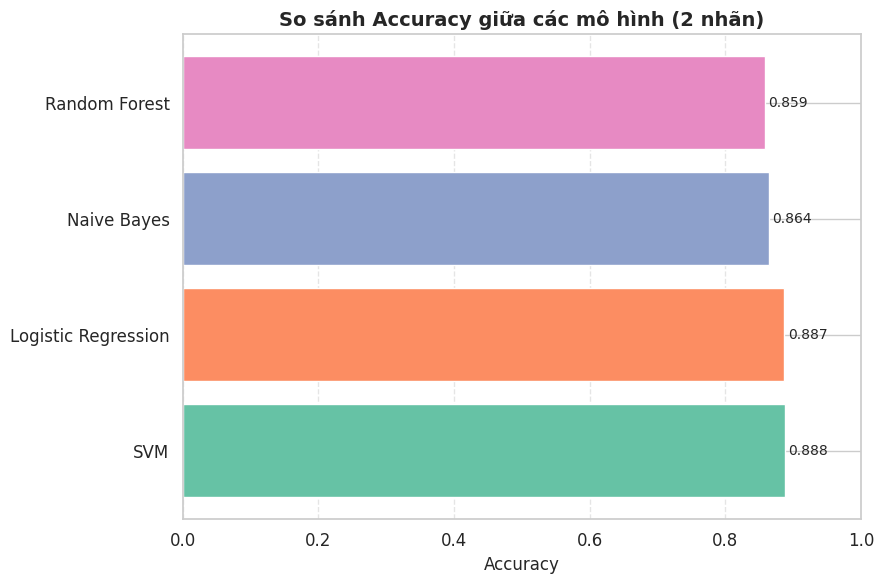

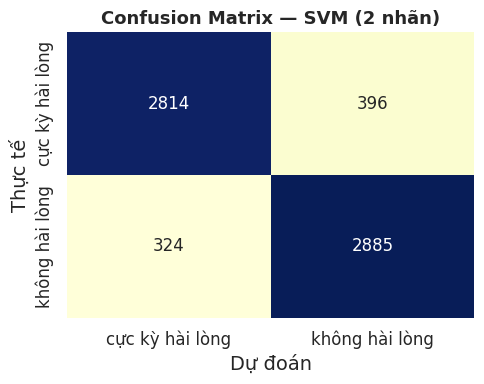

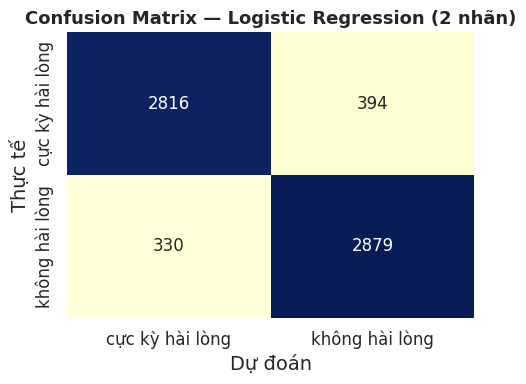

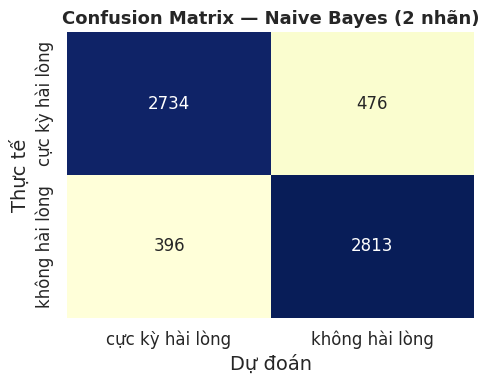

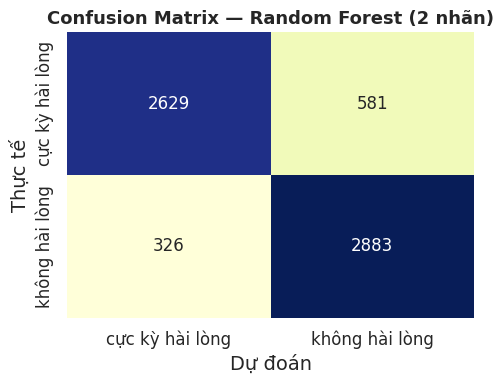

In [115]:
def_truc_quan(ket_qua_2_nhan, label_type="2 nhãn", Y_test=y_test_2)

In [117]:
#3 nhãn

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Định nghĩa danh sách các mô hình cho tập 3 nhãn
models_3 = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Tạo dict chứa kết quả
ket_qua_3_nhan = {}

# Vòng lặp huấn luyện và đánh giá
for model_name, model in models_3.items():
    result = train_and_evaluate_model(
        model,
        X3_count_chi2,
        y_train_3,
        X3_count_chi2_test,
        y_test_3,
        model_name=model_name,
        label_type="3 nhãn"
    )
    ket_qua_3_nhan[model_name] = result
    
result_nb_3  = ket_qua_3_nhan["Naive Bayes"]
result_rf_3  = ket_qua_3_nhan["Random Forest"]
result_lr_3  = ket_qua_3_nhan["Logistic Regression"]
result_svm_3 = ket_qua_3_nhan["SVM"]


Bắt đầu huấn luyện NAIVE BAYES (3 nhãn)...

 ===== NAIVE BAYES (3 nhãn) =====
Thời gian huấn luyện: 0.01 giây
Accuracy     : 0.6804
Precision    : 0.6847
Recall       : 0.6804
F1-score     : 0.6819
Classification Report:
                  precision    recall  f1-score   support

    bình thường       0.57      0.57      0.57      1386
cực kỳ hài lòng       0.84      0.78      0.81      1386
 không hài lòng       0.64      0.69      0.67      1386

       accuracy                           0.68      4158
      macro avg       0.68      0.68      0.68      4158
   weighted avg       0.68      0.68      0.68      4158

Confusion Matrix:
 [[ 788  156  442]
 [ 211 1083   92]
 [ 376   52  958]]

Bắt đầu huấn luyện RANDOM FOREST (3 nhãn)...

 ===== RANDOM FOREST (3 nhãn) =====
Thời gian huấn luyện: 12.44 giây
Accuracy     : 0.6570
Precision    : 0.6601
Recall       : 0.6570
F1-score     : 0.6583
Classification Report:
                  precision    recall  f1-score   support

    bình thường

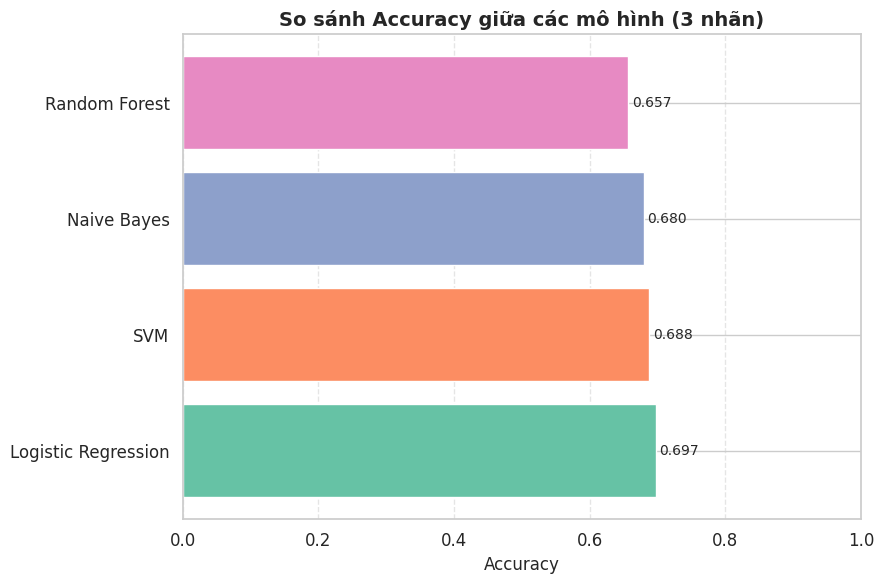

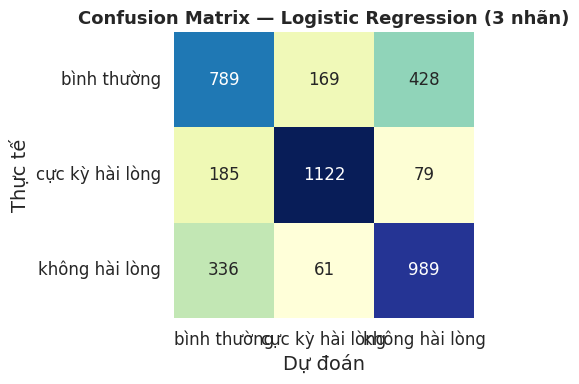

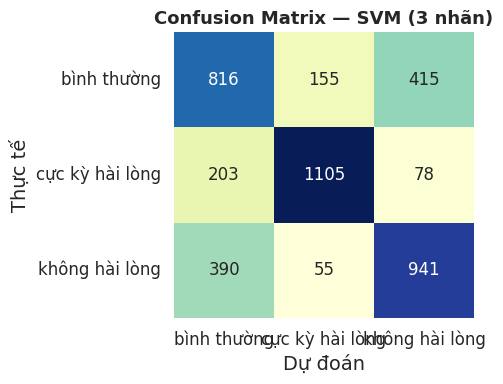

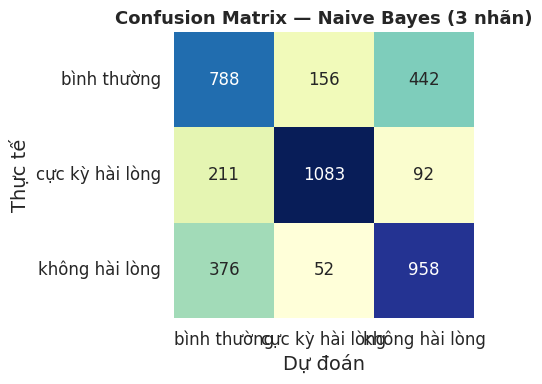

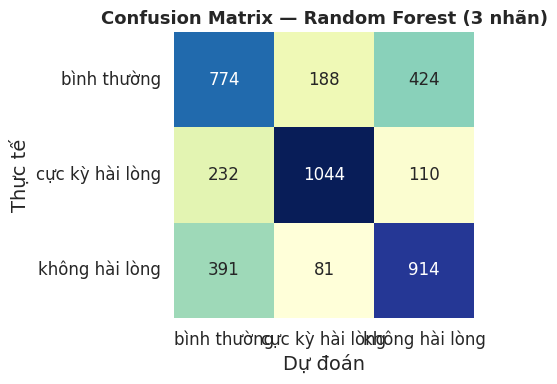

In [121]:
def_truc_quan(ket_qua_3_nhan, label_type="3 nhãn",  Y_test=y_test_3)

In [123]:
#Test mô hình

In [125]:
# Câu cần dự đoán
cau_test = "sản phẩm này đẹp"
cau_test = clean_data(cau_test)

# Vector hóa bằng cả 2 vectorizer
X_cau_test_2 = vectorizer_2.transform([cau_test])
X_cau_test_3 = vectorizer_3.transform([cau_test])

# Áp selector
X_cau_test_3_sel = chi2_sel_count_3.transform(X_cau_test_3)

# In câu đã được xử lý
print(f"Câu đã làm sạch: {cau_test}\n")

# Dự đoán với từng mô hình trong tập 2 nhãn
ket_qua_2 = result_lr_2['model'].predict(X_cau_test_2)
print("Kết quả dự đoán với tập 2 nhãn:", ket_qua_2)

# Dự đoán với từng mô hình trong tập 3 nhãn
ket_qua_3 = result_svm_3['model'].predict(X_cau_test_3_sel)
print("Kết quả dự đoán với tập 3 nhãn:", ket_qua_3)

Câu đã làm sạch: sản_phẩm này đẹp

Kết quả dự đoán với tập 2 nhãn: ['cực kỳ hài lòng']
Kết quả dự đoán với tập 3 nhãn: ['cực kỳ hài lòng']


In [127]:
# Danh sách từ khóa cần tìm
keywords = ["không đẹp", "không xịn", "không tốt"]

# Nhãn cần kiểm tra
labels = ["cực kỳ hài lòng", "không hài lòng"]

# Tạo dict lưu kết quả theo từng nhãn
count_by_label = {}

# Duyệt qua từng nhãn
for label in labels:
    subset = df_balanced_2_label[df_balanced_2_label['title'] == label]
    counts = {
        keyword: subset['clean_content'].str.contains(keyword, case=False, na=False).sum()
        for keyword in keywords
    }
    count_by_label[label] = counts

# Hiển thị kết quả
for label, counts in count_by_label.items():
    print(f"Nhãn: {label}")
    for keyword, count in counts.items():
        print(f"   - '{keyword}': {count}")

Nhãn: cực kỳ hài lòng
   - 'không đẹp': 11
   - 'không xịn': 1
   - 'không tốt': 28
Nhãn: không hài lòng
   - 'không đẹp': 48
   - 'không xịn': 2
   - 'không tốt': 134


In [129]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [131]:
import joblib
from sklearn.svm import SVC

#Huấn luyện lại mô hình SVM tốt nhất

# Khởi tạo lại mô hình SVM với các tham số tốt nhất như trong vòng lặp của bạn
svm_model_2_nhan = SVC(kernel='linear', random_state=42)
svm_model_2_nhan.fit(X_train_2, y_train_2)

print("Đã huấn luyện xong mô hình SVM cho 2 nhãn.")

#Lưu mô hình và vectorizer

# Lưu mô hình SVM đã được huấn luyện
joblib.dump(svm_model_2_nhan, 'svm_model_2_nhan.pkl')

#Lưu lại TfidfVectorizer đã được fit trên dữ liệu train 2 nhãn
joblib.dump(vectorizer_2, 'vectorizer_2_nhan.pkl')

print("Đã lưu thành công model SVM và vectorizer cho 2 nhãn!")
print("Tên file model: svm_model_2_nhan.pkl")
print("Tên file vectorizer: vectorizer_2_nhan.pkl")

Đã huấn luyện xong mô hình SVM cho 2 nhãn.
Đã lưu thành công model SVM và vectorizer cho 2 nhãn!
Tên file model: svm_model_2_nhan.pkl
Tên file vectorizer: vectorizer_2_nhan.pkl
